In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\scs\Downloads\Customer-Churn-analysis-main\Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replace blanks with 0 as tenure is 0 

In [13]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df["customerID"].duplicated().sum()

0

In [22]:
def convert(value): 
    if value == 1: 
        return "yes"
    else: 
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

# Converted 0 and 1 as yes and no respectively of SeniorCitizen Column for easier to understand

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


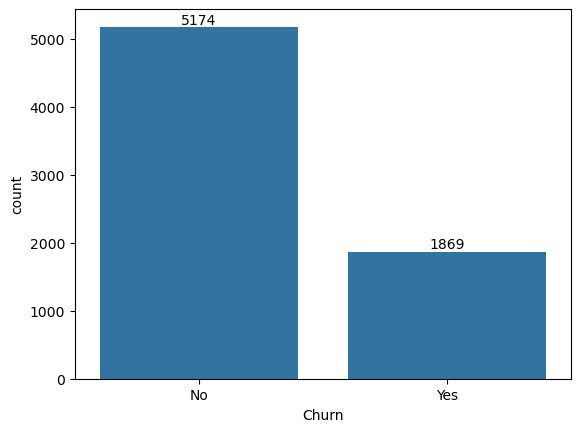

In [30]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0]);

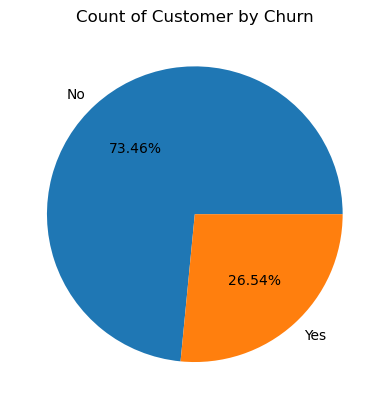

In [46]:
gb = df["Churn"].value_counts()
plt.title("Percentage of Churn")
plt.title("Count of Customer by Churn")
plt.pie(gb,labels = gb.index, autopct = "%.2f%%");

# from the given pie chart we can conclude that 26.54% of customers have churned out
# now lets explore the reason behind it

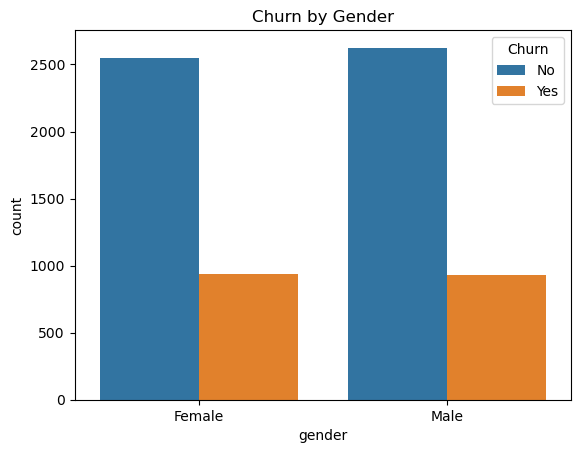

In [54]:
ax = sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

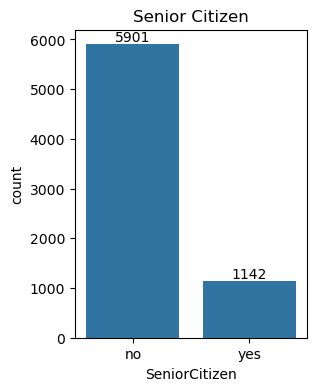

In [70]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0]);
plt.title("Senior Citizen")
plt.show()

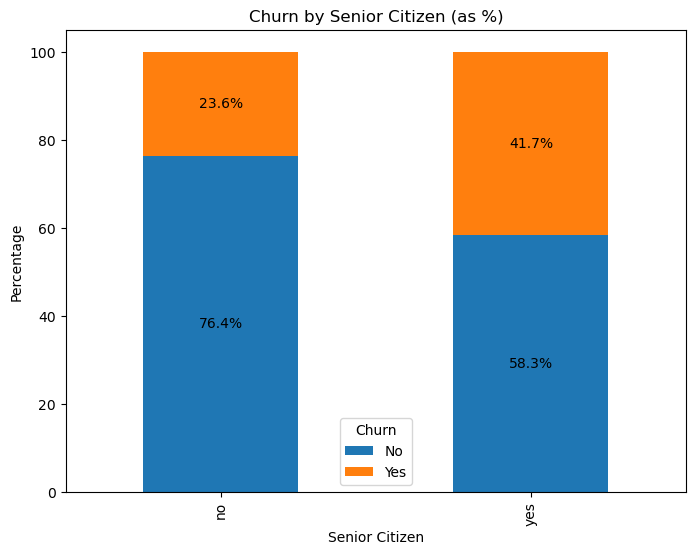

In [58]:
# Calculate the percentage of Churn for Senior Citizens and Non-Senior Citizens
churn_counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
churn_percent.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)

# Add data labels as percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Title and labels
plt.title("Churn by Senior Citizen (as %)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


# Comparetively a greater percentage of people in senior citizen category have curned. 

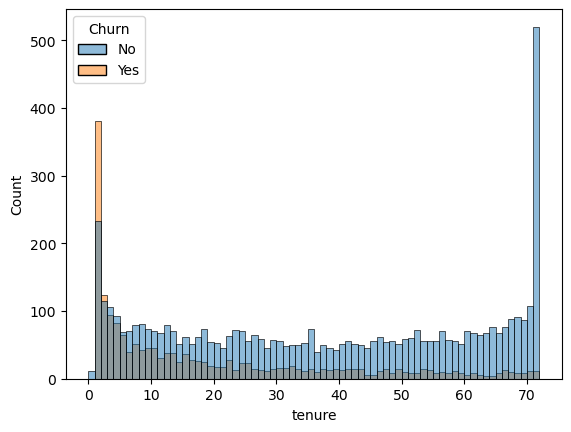

In [72]:
sns.histplot(x = "tenure", data= df, bins = 72, hue = "Churn")
plt.show()

# People who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned.

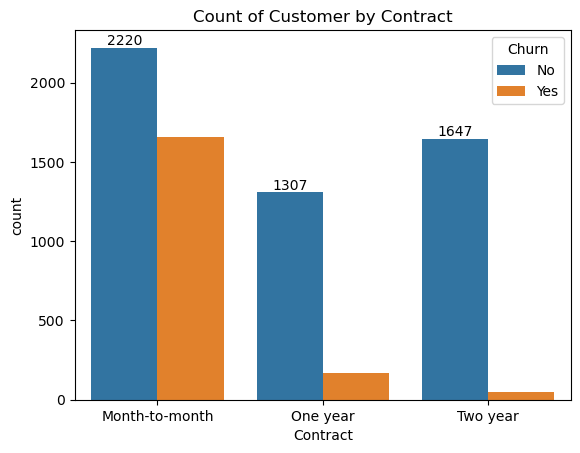

In [75]:
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

# People who have month to month contract are likely to churn than from those who have one or two years of contract.

In [77]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

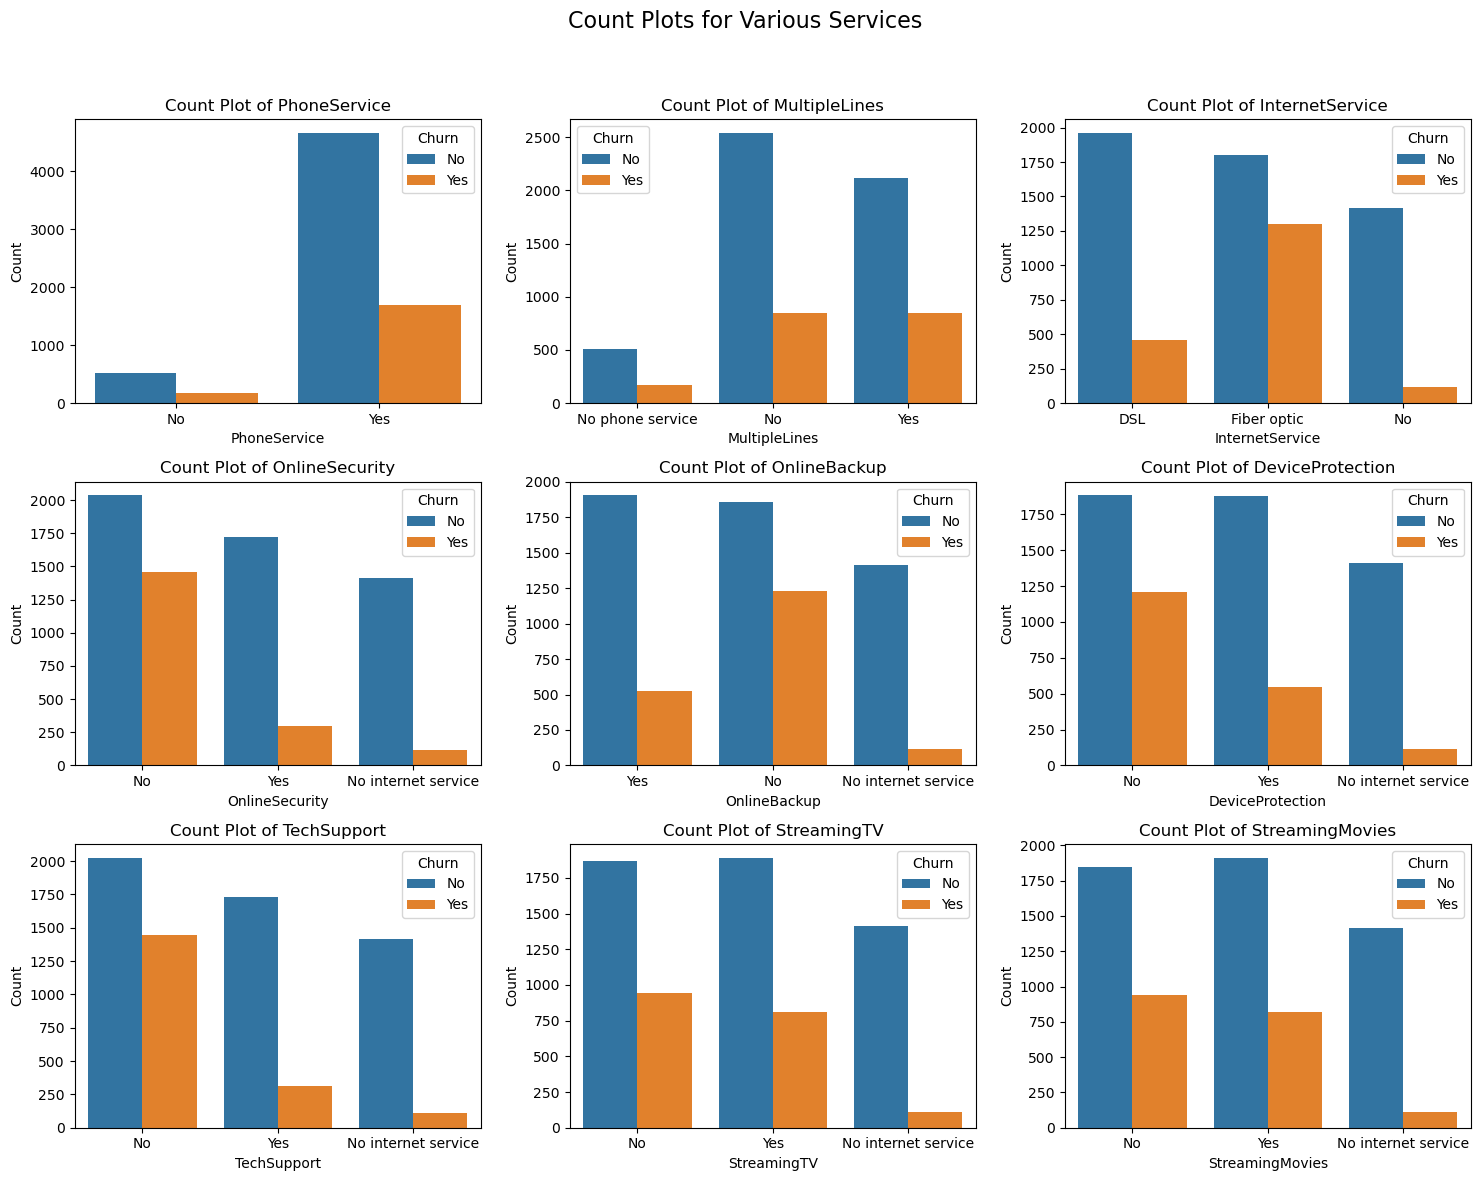

In [82]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjust rows and columns as needed
fig.suptitle("Count Plots for Various Services", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop over each column and create a count plot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn")
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)  # Add x-label for each plot
    axes[i].set_ylabel('Count')

# Hide any unused subplots (in case the number of plots is less than rows*cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()



# Summary of the Count Plots:
Phone Service & Multiple Lines: Most customers have phone service, and churn is more prominent among those who have no phone service or multiple lines.
Internet Services: Customers with fiber optic internet service have higher churn compared to DSL users, indicating potential dissatisfaction.
Online Services (Security, Backup, Device Protection, Tech Support): Churn is significantly higher among customers who do not subscribe to these services, highlighting their importance in customer retention.
Streaming Services (TV & Movies): Customers without streaming services tend to churn less compared to those with access to streaming TV or movies.

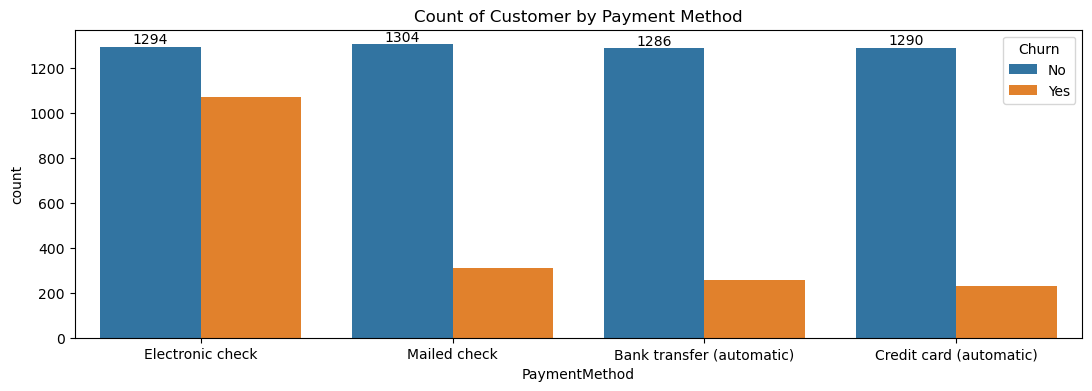

In [90]:
plt.figure(figsize = (13,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Payment Method")
plt.show()

# Customers are likely to churn when they using Electronic Check as a payment method.